In [2]:
import librosa

In [3]:
y, sr = librosa.load('0452.wav')

In [4]:
sr

22050

In [5]:
y

array([-0.00012423, -0.0001069 , -0.00013886, ...,  0.00057355,
        0.00029915,  0.        ], dtype=float32)

In [6]:
len(y)

165369

In [7]:
t = len(y) / sr
t

7.499727891156462

In [8]:
type(y)

numpy.ndarray

In [9]:
import numpy as np

In [10]:
y[:10]

array([-1.24226761e-04, -1.06898864e-04, -1.38864256e-04, -8.30546487e-05,
       -4.70508210e-04, -1.30786153e-04,  1.64628596e-04,  2.40123536e-05,
        6.21992876e-05,  1.31265460e-05], dtype=float32)

In [11]:
y[-10:]

array([0.00149585, 0.00160109, 0.00092849, 0.00072467, 0.00080459,
       0.00046453, 0.00059405, 0.00057355, 0.00029915, 0.        ],
      dtype=float32)

In [12]:
import matplotlib.pyplot as plt

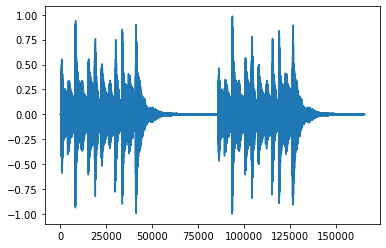

In [13]:
plt.plot(y)
plt.show()

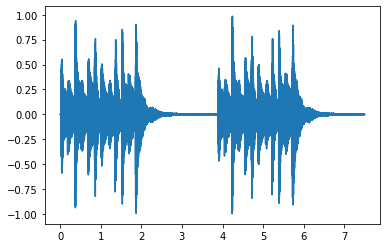

In [14]:
t = np.arange(len(y)) / sr
plt.plot(t, y)
plt.show()

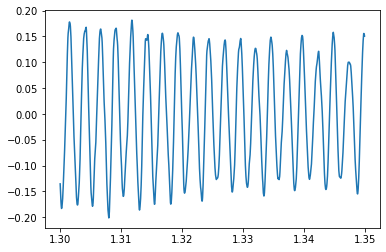

In [17]:
def get_index(t, sr):
    return int(t*sr)

tmin, tmax = 1.3, 1.35
imin, imax = get_index(tmin, sr), get_index(tmax, sr)
t = np.arange(len(y)) / sr
plt.plot(t[imin:imax], y[imin:imax])
plt.show()

In [18]:
librosa.output.write_wav('new_tone.wav', y, sr)

In [19]:
librosa.output.write_wav('new_tone.wav', y[:len(y)//2], sr)

In [21]:
import soundfile as sf
import sounddevice as sd

In [25]:
def async_playback(filename):
    data, sr = sf.read(filename)
    sd.play(data, sr)
    return data, sr

data, sr = async_playback('new_tone.wav')
print('abc')

abc


In [26]:
misc = sd.query_devices()
misc

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone (High Definition Aud, MME (2 in, 0 out)
   2 Headset Microphone (SRS-XB12 Ha, MME (1 in, 0 out)
   3 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  4 Speakers (SRS-XB12 Stereo), MME (0 in, 2 out)
   5 Speakers (High Definition Audio, MME (0 in, 2 out)
   6 Headset Earphone (SRS-XB12 Hand, MME (0 in, 1 out)
   7 Microphone (HD Audio Microphone), Windows WDM-KS (2 in, 0 out)
   8 Speakers (HD Audio Headphone/Speakers), Windows WDM-KS (0 in, 2 out)
   9 Speakers (), Windows WDM-KS (0 in, 2 out)
  10 Headset Earphone (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free AG Audio%0
;(SRS-XB12)), Windows WDM-KS (0 in, 1 out)
  11 Headset Microphone (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free AG Audio%0
;(SRS-XB12)), Windows WDM-KS (1 in, 0 out)

In [27]:
sd.default.device = 2

In [28]:
print(misc[2])

{'name': 'Headset Microphone (SRS-XB12 Ha', 'hostapi': 0, 'max_input_channels': 1, 'max_output_channels': 0, 'default_low_input_latency': 0.09, 'default_low_output_latency': 0.09, 'default_high_input_latency': 0.18, 'default_high_output_latency': 0.18, 'default_samplerate': 44100.0}


In [29]:

def sync_record(filename, duration, sr, channels):
    print('recording')
    my_rec = sd.rec(samplerate=sr, channels=channels, frames=int(duration*sr))
    sd.wait()
    sf.write(filename, data=my_rec, samplerate=sr)
    print('done recording')
    
sync_record('record.wav', 3, 22050, 1)

recording
done recording
